In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import pprint

In [3]:
import glob

path = r"D:\GES"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    fl = pd.read_csv(filename, index_col=None, header=0,skipfooter=1,engine='python')
    fl=fl[['Tarih','Saat','Güneş']]
    fl['GES']=str(filename.split('-')[1])
    li.append(fl)

#df = pd.concat(li, axis=0, ignore_index=True)


In [4]:
def tarih(data):
    y=data.split('.')[0]

    m=data.split('.')[1]

    d=data.split('.')[2]
    
    return y,m,d

In [5]:
#for i in range(len(all_files)):
for i in range(18):
    li[i]['Tarih']=li[i]['Tarih'].apply(lambda x : tarih(x))
    li[i]['gun']=li[i]['Tarih'].apply(lambda x: x[0]).apply(lambda x: int(x))
    li[i]['ay']=li[i]['Tarih'].apply(lambda x: x[1]).apply(lambda x: int(x))
    li[i]['yıl']=li[i]['Tarih'].apply(lambda x: x[2]).apply(lambda x: int(x))
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x.replace(',','.')).apply(lambda x: float(x))
    li[i]=li[i].drop(columns='Tarih') 
    li[i]=li[i][['yıl','ay','gun','Saat','Güneş','GES']]

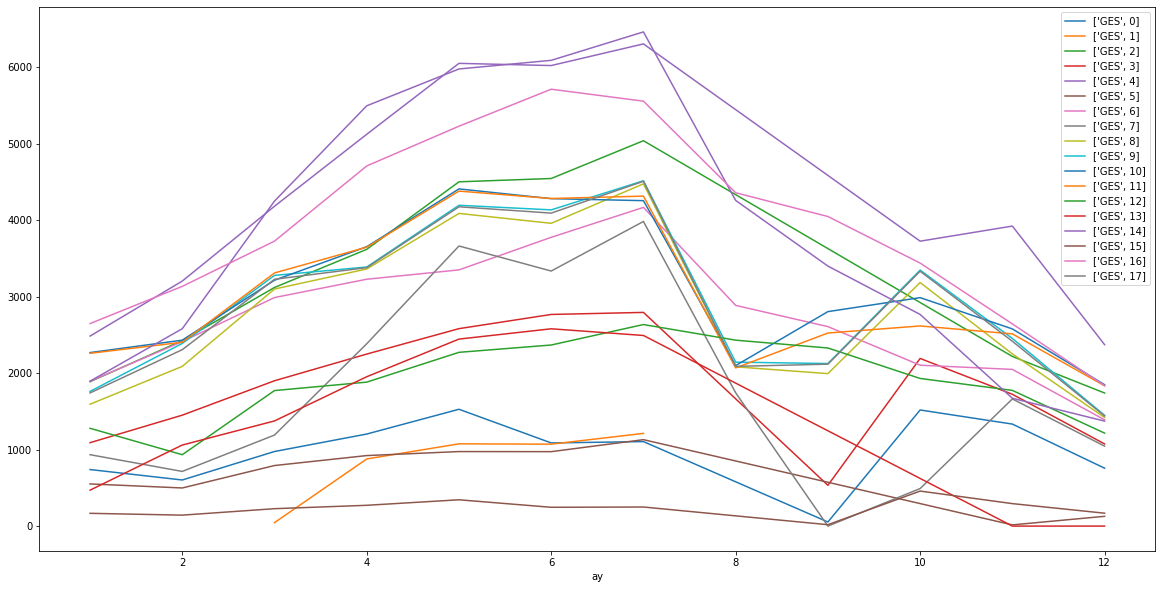

In [6]:
plt.figure(figsize=(20,10))
l=[]
for i in range(18):
    li[i].groupby(['ay']).sum()['Güneş'].plot()
    l.append(['GES',i])
plt.legend(l)

#### Santrallerin ilk üretim tarihleri 

In [7]:
df = pd.concat(li, axis=0, ignore_index=True)
df.groupby('GES').head(1)

,yıl,ay,gun,Saat,Güneş,GES
0,2019,9,26,00:00,0.0,AFTA
7423,2020,3,30,00:00,0.0,ALIBEY
10398,2019,11,6,00:00,0.0,ALIBEYHOYUGU
16853,2019,9,17,00:00,0.0,APA
24507,2019,10,9,00:00,0.0,CINGILLI
31634,2019,11,27,08:00,0.2,DENIZLI
37570,2016,11,3,00:00,0.0,HALK
69669,2018,8,1,00:00,0.0,HAMAL
84840,2018,9,27,00:00,0.0,ME
101015,2018,9,27,00:00,0.0,MT


In [14]:
xa=df['GES'].unique()
#xa=str(xa)
xa

array(['AFTA', 'ALIBEY', 'ALIBEYHOYUGU', 'APA', 'CINGILLI', 'DENIZLI',
       'HALK', 'HAMAL', 'ME', 'MT', 'OMICRONENGIL', 'OMICRONERCIS', 'PSI',
       'RA', 'RENOE', 'SOLANA', 'SOLENTEGRE', 'YAYSUN'], dtype=object)

## Yıllık Toplam Enerji Üretim Kapasiteleri

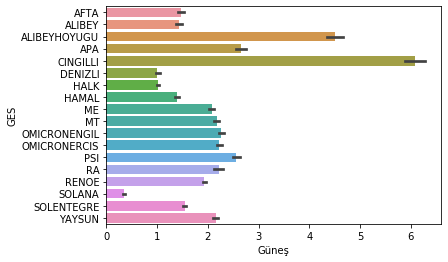

In [8]:

sns.barplot(x=df['Güneş'],y=df['GES'],data=df)
    


# OCAK AYI

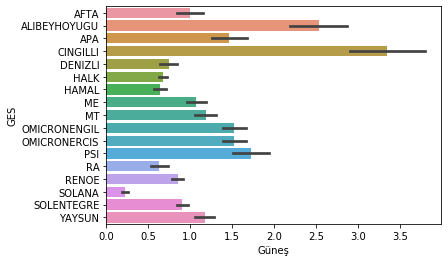

In [9]:
ay=df[df['ay']==1]
sns.barplot(x=ay['Güneş'],y=ay['GES'],data=ay)

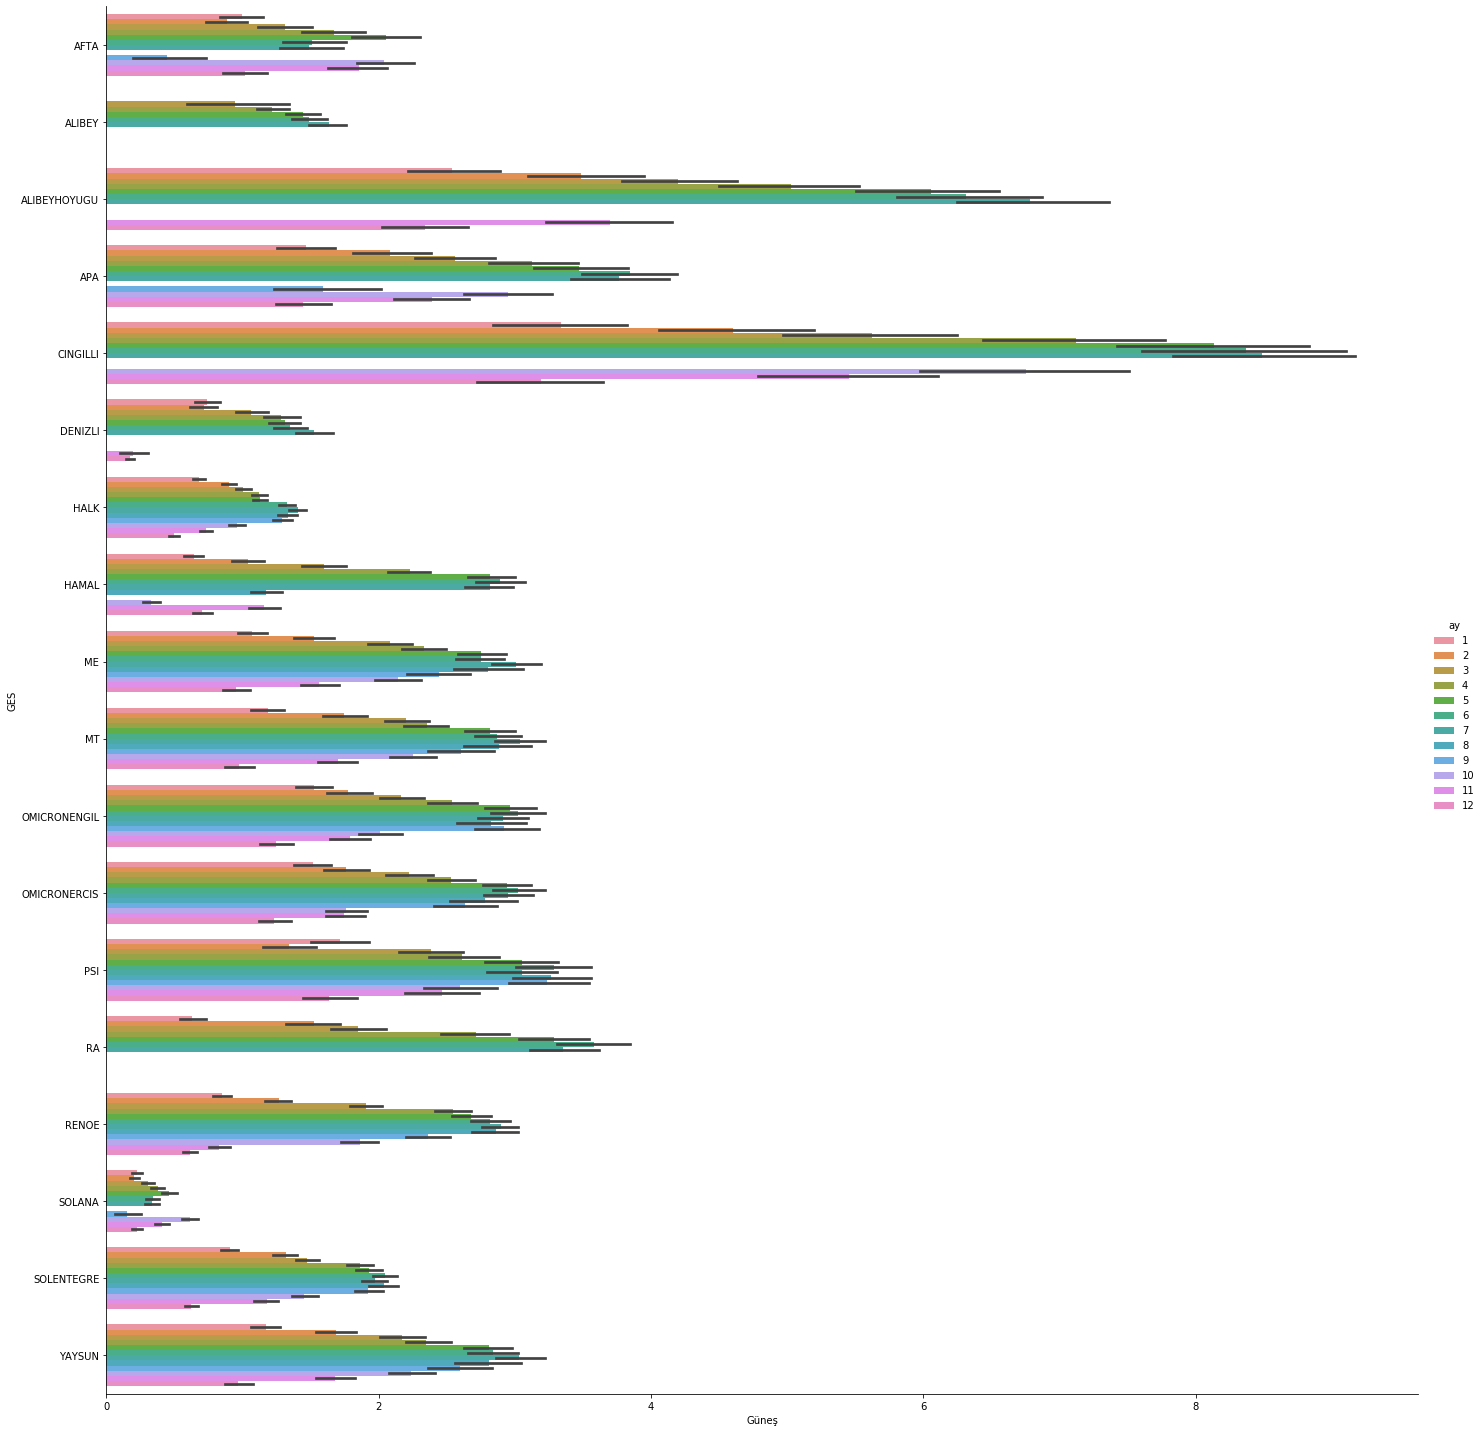

In [131]:
g = sns.catplot(x="Güneş", y="GES",hue='ay',data=df,
                height=20, kind="bar")

#### Santral Özelinde Dağılım inceleme

In [10]:
afta=df[df['GES']=='AFTA']

afta.groupby('ay')['Güneş'].describe()

,count,mean,std,min,25%,50%,75%,max
ay,,,,,,,,
1,744.0,0.994301,2.198623,0.0,0.0,0.0,0.6800,9.79
2,680.0,0.886926,2.061410,0.0,0.0,0.0,0.0900,9.79
3,744.0,1.311492,2.717302,0.0,0.0,0.0,0.7375,9.79
4,720.0,1.672750,3.161653,0.0,0.0,0.0,1.1850,9.80
5,744.0,2.054180,3.421162,0.0,0.0,0.0,3.2700,9.80
6,720.0,1.510847,3.148030,0.0,0.0,0.0,0.1600,9.80
7,743.0,1.487725,3.175200,0.0,0.0,0.0,0.0800,9.80
9,120.0,0.446583,1.533988,0.0,0.0,0.0,0.0000,6.56
10,744.0,2.041519,2.832239,0.0,0.0,0.0,4.3725,9.79


In [11]:
aftamax=afta.groupby('ay')['Güneş'].describe()['max']
aftamean=afta.groupby('ay')['Güneş'].describe()['mean']

In [12]:
pp = pprint.PrettyPrinter(width=41,depth=6, compact=True)

In [15]:
for i in range(len(xa)):
    gess=df[df['GES']==xa[i]]
    print(xa[i])
    pp.pprint(gess.groupby('ay')['Güneş'].describe())
    #x=pd.DataFrame(gess.groupby('ay')['Güneş'].describe())
    #print(x)

AFTA
    count      mean       std  min  25%  50%     75%   max
ay                                                        
1   744.0  0.994301  2.198623  0.0  0.0  0.0  0.6800  9.79
2   680.0  0.886926  2.061410  0.0  0.0  0.0  0.0900  9.79
3   744.0  1.311492  2.717302  0.0  0.0  0.0  0.7375  9.79
4   720.0  1.672750  3.161653  0.0  0.0  0.0  1.1850  9.80
5   744.0  2.054180  3.421162  0.0  0.0  0.0  3.2700  9.80
6   720.0  1.510847  3.148030  0.0  0.0  0.0  0.1600  9.80
7   743.0  1.487725  3.175200  0.0  0.0  0.0  0.0800  9.80
9   120.0  0.446583  1.533988  0.0  0.0  0.0  0.0000  6.56
10  744.0  2.041519  2.832239  0.0  0.0  0.0  4.3725  9.79
11  720.0  1.853389  3.167292  0.0  0.0  0.0  2.1325  9.80
12  744.0  1.018011  2.190037  0.0  0.0  0.0  0.8700  9.80
ALIBEY
    count      mean       std  min  25%    50%     75%   max
ay                                                          
3    48.0  0.945000  1.358803  0.0  0.0  0.075  2.2075  4.14
4   720.0  1.219986  1.669681  0.0  0.

### Time Series Trial

In [212]:
path = r"D:\GES"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    fl = pd.read_csv(filename, index_col=None, header=0,skipfooter=1,engine='python')
    fl=fl[['Tarih','Saat','Güneş']]
    fl['GES']=str(filename.split('-')[1])
    li.append(fl)
    
data = pd.concat(li, axis=0, ignore_index=True)
#data['Tarih'] = pd.to_datetime(data['Tarih'])
#data.dtypes

In [213]:
data['Tarihsaat']=pd.to_datetime(data['Tarih']+' '+data['Saat'])
data=data.set_index('Tarihsaat')
data


,Tarih,Saat,Güneş,GES
Tarihsaat,,,,
2019-09-26 00:00:00,26.09.2019,00:00,"0,00",AFTA
2019-09-26 01:00:00,26.09.2019,01:00,"0,00",AFTA
2019-09-26 02:00:00,26.09.2019,02:00,"0,00",AFTA
2019-09-26 03:00:00,26.09.2019,03:00,"0,00",AFTA
2019-09-26 04:00:00,26.09.2019,04:00,"0,00",AFTA
...,...,...,...,...
2020-07-31 18:00:00,31.07.2020,18:00,"1,10",YAYSUN
2020-07-31 19:00:00,31.07.2020,19:00,"0,09",YAYSUN
2020-07-31 20:00:00,31.07.2020,20:00,"0,00",YAYSUN


In [214]:
data.dtypes
#data.asfreq('H')
#data_freq

Tarih    object
Saat     object
Güneş    object
GES      object
dtype: object

In [215]:
data['Güneş']=data['Güneş'].apply(lambda x: x.replace(',','.')).apply(lambda x: float(x))

In [216]:
data.dtypes

Tarih     object
Saat      object
Güneş    float64
GES       object
dtype: object

In [217]:
data.index

DatetimeIndex(['2019-09-26 00:00:00', '2019-09-26 01:00:00',
               '2019-09-26 02:00:00', '2019-09-26 03:00:00',
               '2019-09-26 04:00:00', '2019-09-26 05:00:00',
               '2019-09-26 06:00:00', '2019-09-26 07:00:00',
               '2019-09-26 08:00:00', '2019-09-26 09:00:00',
               ...
               '2020-07-31 13:00:00', '2020-07-31 14:00:00',
               '2020-07-31 15:00:00', '2020-07-31 16:00:00',
               '2020-07-31 17:00:00', '2020-07-31 18:00:00',
               '2020-07-31 19:00:00', '2020-07-31 20:00:00',
               '2020-07-31 21:00:00', '2020-07-31 22:00:00'],
              dtype='datetime64[ns]', name='Tarihsaat', length=242264, freq=None)

### resampling


In [190]:
def ciz(datan,name1,name2):
    fig, ax = plt.subplots(figsize = (11,4))
    #ax.plot(data['Güneş'], marker='.', markersize=2, color='0.8',linestyle='None', label='')
    
    ax.plot(datan['Güneş'], linewidth=2, label=str(name2))
    #datan['Güneş'].plot()
    ax.legend()
    ax.set_xlabel(name1)
    ax.set_ylabel('Üretim')
    ax.set_title('GES Enerji Üretim Grafiği'+name2)


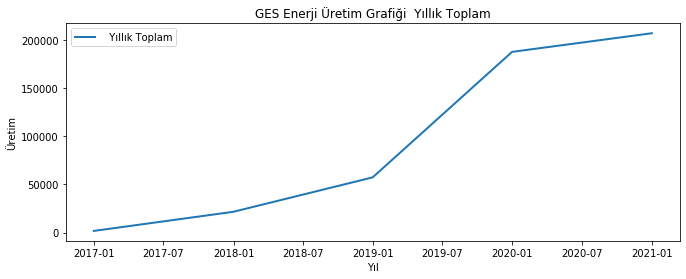

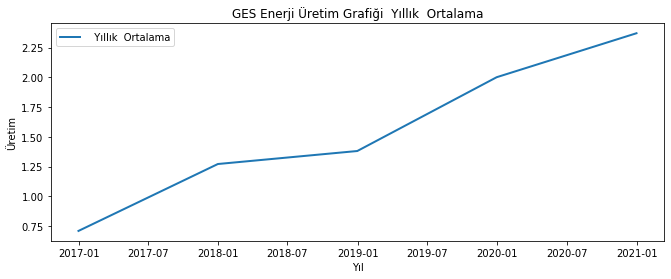

In [191]:
data_col=['Güneş']
data_yearly_mean = data[data_col].resample('A').sum() 
ciz(data_yearly_mean,'Yıl',"  Yıllık Toplam")
data_yearly_sum=data[data_col].resample('A').mean()
ciz(data_yearly_sum,'Yıl',"  Yıllık  Ortalama")

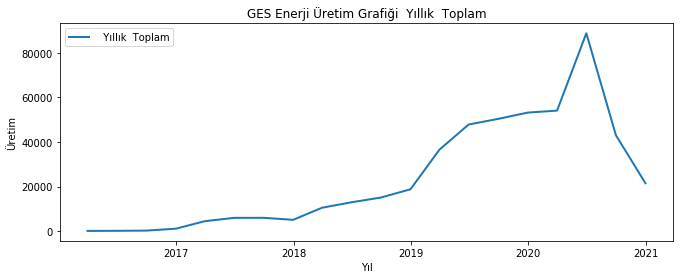

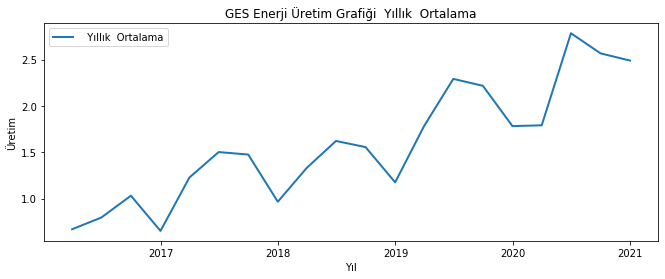

In [187]:

data_quarterly_sum = data[data_col].resample('Q').sum() 
ciz(data_quarterly_sum,'Mevsimlik',"  Mevsimlik  Toplam")#Çeyrek aslında


data_quarterly_mean = data[data_col].resample('Q').mean() 
ciz(data_quarterly_mean,'Mevsimlik',"  Mevsimlik  Ortalama")

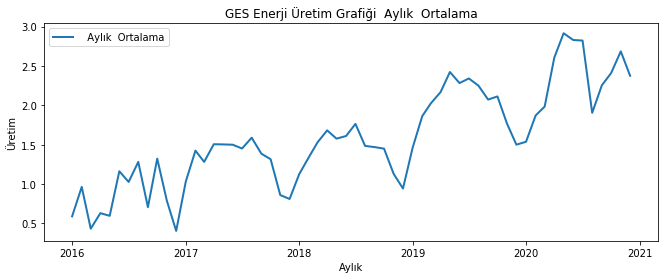

In [272]:
data_monthly_mean = data[data_col].resample('MS').mean()
ciz(data_monthly_mean,'Aylık',"  Aylık  Ortalama")

Bazı GES verileri sonradan başladığı için trendlerdeki artış yeni açılan istasyonların verisinin de dahil olmasından kaynaklanıyor olarak yorumluyorum. 

### Rolling window 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


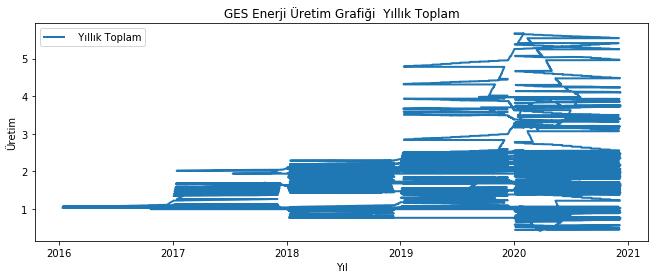

In [242]:
data_year_rol = data[data_col].rolling(window = 8760, center = True).mean()
#fig, ax = plt.subplots(figsize = (11,4))
#plt.plot(data_year_rol,'bo')
ciz(data_year_rol,'Yıl',"  Yıllık Toplam")

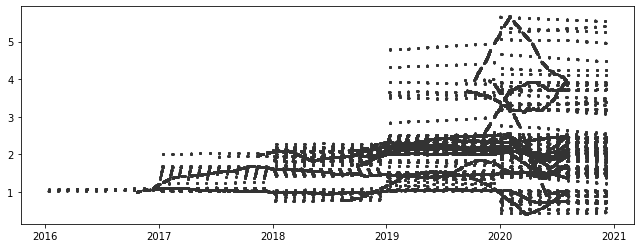

In [209]:
data_year_rol = data[data_col].rolling(window = 8760, center = True).mean()
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data_year_rol['Güneş'], marker='.', markersize=2, color='0.2',linestyle='None', label='')

:) :) :)


#### Halk

In [218]:
halk=data[data['GES']=='HALK']
#data = data.set_index('Tarih')
halk

,Tarih,Saat,Güneş,GES
Tarihsaat,,,,
2016-03-11 00:00:00,03.11.2016,00:00,0.00,HALK
2016-03-11 01:00:00,03.11.2016,01:00,0.00,HALK
2016-03-11 02:00:00,03.11.2016,02:00,0.00,HALK
2016-03-11 03:00:00,03.11.2016,03:00,0.00,HALK
2016-03-11 04:00:00,03.11.2016,04:00,0.00,HALK
...,...,...,...,...
2020-07-31 18:00:00,31.07.2020,18:00,0.28,HALK
2020-07-31 19:00:00,31.07.2020,19:00,0.00,HALK
2020-07-31 20:00:00,31.07.2020,20:00,0.00,HALK


##### Halk Yıllık

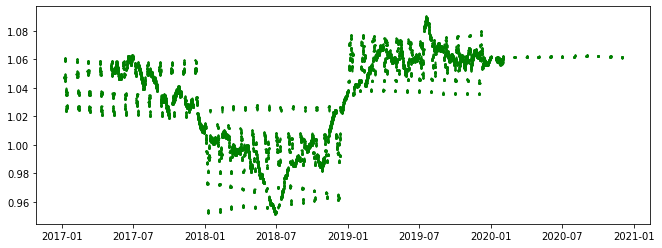

In [247]:
data_year_rol = halk[data_col].rolling(window = 8760, center = True).mean()
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data_year_rol['Güneş'], marker='.', markersize=2, color='g',linestyle='None', label='')

##### Halk Aylık

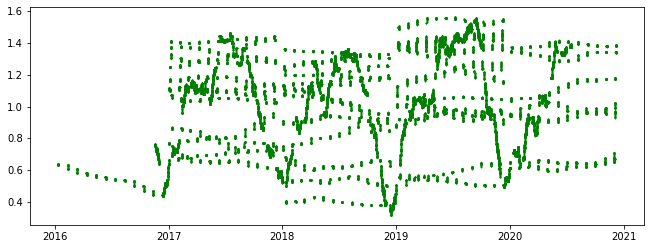

In [246]:
data_month_rol = halk[data_col].rolling(window = 720, center = True).mean()
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data_month_rol['Güneş'], marker='.', markersize=2, color='g',linestyle='None', label='')

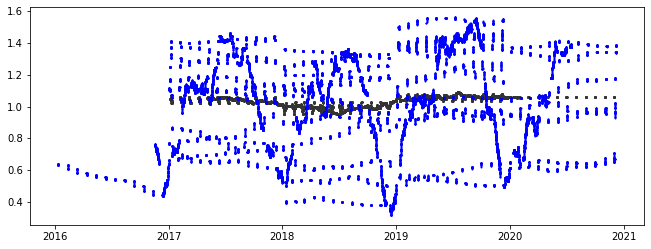

In [248]:
data_year_rol = halk[data_col].rolling(window = 8760, center = True).mean()
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data_year_rol['Güneş'], marker='.', markersize=2, color='0.2',linestyle='None', label='Yıl')
ax.plot(data_month_rol['Güneş'], marker='.', markersize=2, color='b', linestyle='None', label='Ay')

#### Yaysun 

In [250]:
yaysun=data[data['GES']=='YAYSUN']
#data = data.set_index('Tarih')


##### Yaysun Yıllık

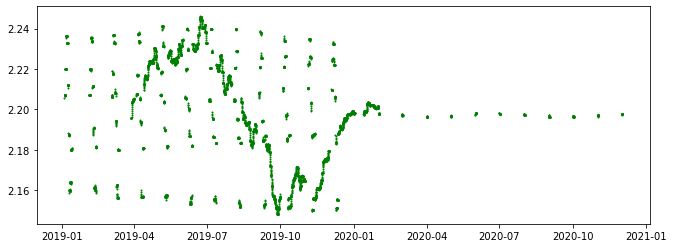

In [260]:
data_year_rol = yaysun[data_col].rolling(window = 8760, center = True).mean()
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data_year_rol['Güneş'], marker='.', markersize=2, color='g',linestyle='None', label='')


No handles with labels found to put in legend.


Text(0.5, 1.0, 'GES Enerji Üretim Grafiği')

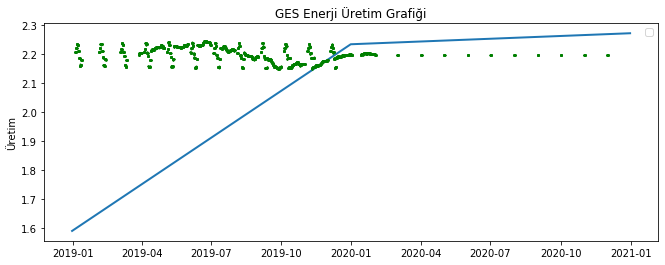

In [266]:
fig, ax = plt.subplots(figsize = (11,4))
    #ax.plot(data['Güneş'], marker='.', markersize=2, color='0.8',linestyle='None', label='')
data_yearly_mean = yaysun[data_col].resample('A').mean() 
ax.plot(data_yearly_mean['Güneş'], linewidth=2)
ax.plot(data_year_rol['Güneş'], marker='.', markersize=2, color='g',linestyle='None', label='')
    #datan['Güneş'].plot()
ax.legend()
#ax.set_xlabel(name1)
ax.set_ylabel('Üretim')
ax.set_title('GES Enerji Üretim Grafiği')

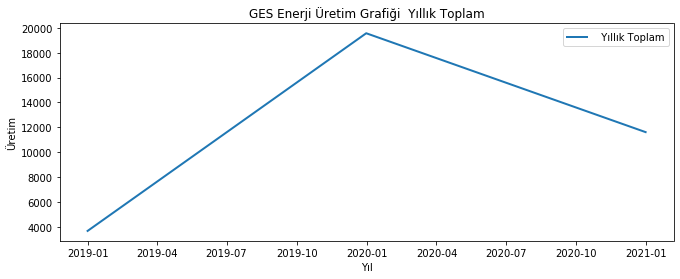

In [257]:
data_yearly_mean = yaysun[data_col].resample('A').sum() 
ciz(data_yearly_mean,'Yıl',"  Yıllık Toplam")

##### Yaysun Aylık

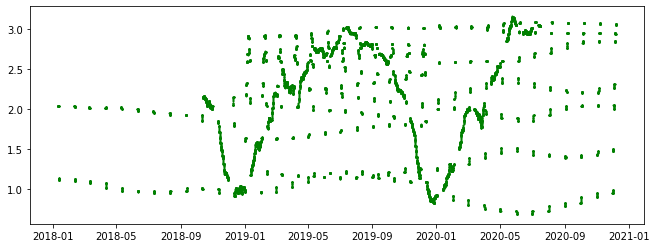

In [252]:
data_month_rol = yaysun[data_col].rolling(window = 720, center = True).mean()
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data_month_rol['Güneş'], marker='.', markersize=2, color='g',linestyle='None', label='')